# Отчет по курсовому проекту по эконометрике
## Cтудент: Цыкин Иван
## Вариант 12

## 2.0 Библиотеки

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f
from sklearn.linear_model import QuantileRegressor
from scipy.stats import normaltest
from scipy.stats import bartlett
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import warnings
import random
warnings.filterwarnings('ignore')

## 2.1 Модельная часть

$$ \Large f(h)=sin(3x)+1.5cos(4x)+2x $$
$$ \Large-2 < h < 2 $$
$$ \Large\sigma^2 = 2 $$

In [2]:
k = 100
mu, sigma = 0, math.sqrt(2)
t = np.linspace(-2, 2, k)
df = pd.DataFrame(t[20:80], columns=['t'])
df_test = pd.DataFrame(np.append(t[0:20], t[80:100]), columns=['t'])

In [3]:
def f_(x):
    return math.sin(3*x) + 1.5*math.cos(4*x) + 2*x

In [4]:
e = np.random.normal(mu, sigma, k)
df['e'] = e[20:80]
df_test['e']= np.append(e[0:20], e[80:100])

In [5]:
x = np.array([f_(t[i])+e[i] for i in range(len(t))])
df['x'] = x[20:80]
df_test['x']= np.append(x[0:20], x[80:100])

In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,0.912670,2.619852,3.459131,0.951672,1.172099,-4.008235,0.710613,0.790720,1.319915,-0.852677,...,0.778847,-2.100256,-3.734664,-0.782594,-2.320515,-0.119996,-2.155087,1.567651,-0.477872,1.526083
x,-0.967626,0.465499,1.030352,-1.743980,-1.775176,-7.184603,-2.665609,-2.750146,-2.345281,-4.597769,...,1.567969,-1.270106,-2.834031,0.217021,-1.195187,1.155264,-0.708850,3.202181,1.358096,3.572158


In [7]:
df.shape

(60, 3)

In [8]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
t,-2.000000,-1.959596,-1.919192,-1.878788,-1.838384,-1.797980,-1.757576,-1.717172,-1.676768,-1.636364,...,1.636364,1.676768,1.717172,1.757576,1.797980,1.838384,1.878788,1.919192,1.959596,2.000000
e,-2.947741,-2.015289,-0.941866,0.254031,-3.270297,0.492599,-0.965365,-0.182704,-0.826757,0.409987,...,2.009857,-0.440639,-1.071631,-0.013538,-0.255151,-0.486510,-1.121627,-1.191364,-0.695439,1.310375
x,-6.886575,-5.517620,-4.014078,-2.402316,-5.532617,-1.404646,-2.532966,-1.461771,-1.863156,-0.433317,...,5.750574,3.330253,2.707742,3.755013,3.486329,3.215261,2.531871,2.409711,2.853684,4.812709


In [9]:
df_test.shape

(40, 3)

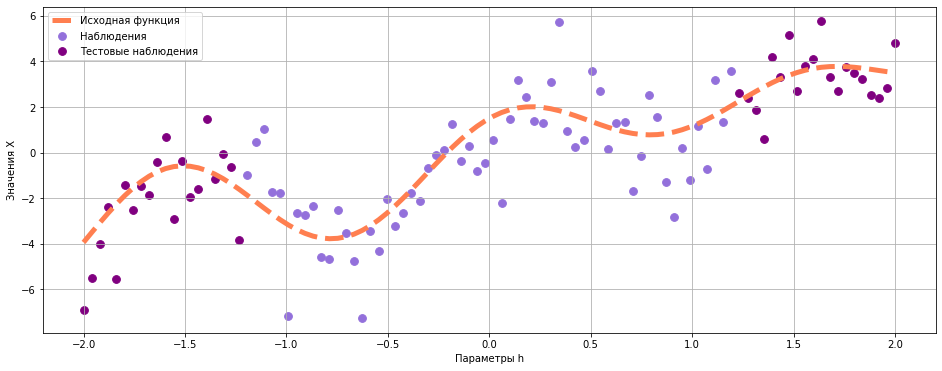

In [10]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, [f_(i) for i in t], '--',color='coral', linewidth = 5, label='Исходная функция')
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df_test['t'], df_test['x'], color='purple', s=60, label='Тестовые наблюдения')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

$ \large В \: результате \: получилось \: смоделировать \: выборку \: по \: данным \: мне \: условиям. \: На \: графике \: приведены \: значения \: исходной \: функции, \: она \: изображена \: оранжевым \: пунктиром. \: Лавандовые \: точки \: изображены \: наблюдения \: тренировочной \: выборки, \: а \: фиолетовыми \: изображены \: тесовые \: наблюдения, \: которые \: находятся \: слева \: и \: справа \: от \: тестовой. \: Все \: значения \: смоделированы \: согласно \: условиям, \: что \: на \: исходную \: функцию \: влияют \: ошибки \: нормального \: распределения.$

## 2.2. Метод наименьших квадратов

$$ \Large Для \; модели \; Y_k = \theta_0 + \theta_1 \cdot h_k, \; k = 1 ..60 \;$$
$$$$
$ \Large -\; найти \; МНК-оцеку \; неизвестных \; параметров$

$ \Large Найдем \; ее \; по \; формуле:$
$$\Large \hat{\Theta} = (H^T \cdot H)^{-1} H^T Y$$

In [11]:
H_T = np.array([[1 for i in range(60)], df['t']])
H = H_T.T
H.shape, H_T.shape

((60, 2), (2, 60))

In [12]:
W = np.dot(H_T, H)
W = np.linalg.inv(W)
HX = np.dot(H_T, df.x)
tetha = np.dot(W, HX)
print('МНК-оценка:', tetha[0], tetha[1])

МНК-оценка: -0.5320956476704726 2.173201718708428


In [13]:
Xmnk = np.array([tetha[0] + tetha[1]*i for i in df.t])
X_true = np.array([f_(i) for i in df.t])
df['Xmnk'] = Xmnk
df['X_true'] = X_true
df.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,0.912670,2.619852,3.459131,0.951672,1.172099,-4.008235,0.710613,0.790720,1.319915,-0.852677,...,0.778847,-2.100256,-3.734664,-0.782594,-2.320515,-0.119996,-2.155087,1.567651,-0.477872,1.526083
x,-0.967626,0.465499,1.030352,-1.743980,-1.775176,-7.184603,-2.665609,-2.750146,-2.345281,-4.597769,...,1.567969,-1.270106,-2.834031,0.217021,-1.195187,1.155264,-0.708850,3.202181,1.358096,3.572158
Xmnk,-3.122376,-3.034570,-2.946764,-2.858958,-2.771152,-2.683346,-2.595540,-2.507734,-2.419927,-2.332121,...,1.267930,1.355736,1.443542,1.531348,1.619155,1.706961,1.794767,1.882573,1.970379,2.058185
X_true,-1.880296,-2.154353,-2.428779,-2.695651,-2.947276,-3.176368,-3.376222,-3.540866,-3.665195,-3.745092,...,0.789122,0.830149,0.900633,0.999616,1.125329,1.275260,1.446237,1.634529,1.835969,2.046075


$\Large - \; Построить \; график:$

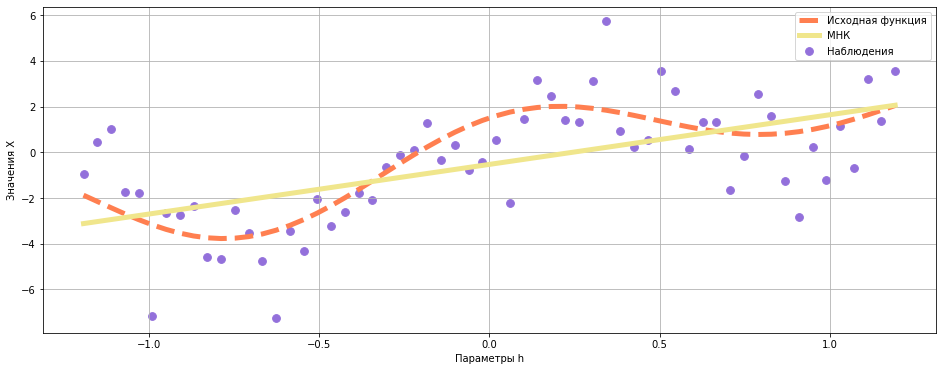

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['t'], df['X_true'], '--',color='coral', linewidth = 5, label='Исходная функция')
ax.plot(df['t'], df['Xmnk'], color='khaki', linewidth = 5, label='МНК')
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

$ \Large -\; Вычислить \; коэффициент \; детерминации \; и\; найти\; оценку\; ковариационной\; матрицы\;
МНК-оценки:$

In [15]:
df['X_true-Xmnk'] = (df.x - df['Xmnk'])
df['Xmnk-Xavg'] = (df['Xmnk'] - df['x'].mean())
df['X_true-Xavg'] = (df.x - df['x'].mean())
df['(X_true-Xmnk)^2'] = (df.x - df['Xmnk'])**2
df['(Xmnk-Xavg)^2'] = (df['Xmnk'] - df['x'].mean())**2
df['(X_true-Xavg)^2'] = (df.x - df['x'].mean())**2
df.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,0.912670,2.619852,3.459131,0.951672,1.172099,-4.008235,0.710613,0.790720,1.319915,-0.852677,...,0.778847,-2.100256,-3.734664,-0.782594,-2.320515,-0.119996,-2.155087,1.567651,-0.477872,1.526083
x,-0.967626,0.465499,1.030352,-1.743980,-1.775176,-7.184603,-2.665609,-2.750146,-2.345281,-4.597769,...,1.567969,-1.270106,-2.834031,0.217021,-1.195187,1.155264,-0.708850,3.202181,1.358096,3.572158
Xmnk,-3.122376,-3.034570,-2.946764,-2.858958,-2.771152,-2.683346,-2.595540,-2.507734,-2.419927,-2.332121,...,1.267930,1.355736,1.443542,1.531348,1.619155,1.706961,1.794767,1.882573,1.970379,2.058185
X_true,-1.880296,-2.154353,-2.428779,-2.695651,-2.947276,-3.176368,-3.376222,-3.540866,-3.665195,-3.745092,...,0.789122,0.830149,0.900633,0.999616,1.125329,1.275260,1.446237,1.634529,1.835969,2.046075
X_true-Xmnk,2.154751,3.500069,3.977116,1.114978,0.995976,-4.501257,-0.070069,-0.242412,0.074647,-2.265648,...,0.300039,-2.625843,-4.277573,-1.314327,-2.814341,-0.551697,-2.503617,1.319608,-0.612283,1.513973
Xmnk-Xavg,-2.590281,-2.502475,-2.414669,-2.326862,-2.239056,-2.151250,-2.063444,-1.975638,-1.887832,-1.800026,...,1.800026,1.887832,1.975638,2.063444,2.151250,2.239056,2.326862,2.414669,2.502475,2.590281
X_true-Xavg,-0.435530,0.997595,1.562447,-1.211884,-1.243081,-6.652507,-2.133514,-2.218050,-1.813185,-4.065673,...,2.100065,-0.738011,-2.301936,0.749117,-0.663091,1.687360,-0.176755,3.734277,1.890192,4.104254
(X_true-Xmnk)^2,4.642951,12.250485,15.817450,1.243177,0.991967,20.261316,0.004910,0.058764,0.005572,5.133159,...,0.090024,6.895049,18.297635,1.727456,7.920516,0.304369,6.268099,1.741365,0.374890,2.292114
(Xmnk-Xavg)^2,6.709555,6.262380,5.830624,5.414289,5.013373,4.627877,4.257801,3.903145,3.563909,3.240092,...,3.240092,3.563909,3.903145,4.257801,4.627877,5.013373,5.414289,5.830624,6.262380,6.709555


In [16]:
R = 1 - (df.shape[0]-1)/(df.shape[0] - 2)*df['(X_true-Xmnk)^2'].sum()/df['(X_true-Xavg)^2'].sum()
print('Коэффицент детерминации')
print(R)

Коэффицент детерминации
0.3298872150661596


In [17]:
sigma_e2 = df['(X_true-Xmnk)^2'].sum()/(k-2)
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_e2}')

Несмещенная оценка квадратов ошибки для МНК - 2.732958031420202


In [18]:
cov_matrix = sigma_e2 * W
print('Ковариацонная матрица')
print(cov_matrix)

Ковариацонная матрица
[[ 4.55493005e-02 -5.50859034e-18]
 [-5.50859034e-18  9.30318202e-02]]


$\large Значение \: коэффициента \: детерминации \: получилась \: равная \: 0.33. \: это \: значение \: неблизко \: к \: 1, \: что \: показывает, \: что \: присутствует \: несильное \: превосходство \: модели \: над \: тривиальной \: p=1 \: (X_{avg}). \: Несмещенная \: оценка \: квадратов \: ошибок \: получилась \: равная \: 2.73.$

$ \Large -\;Найти\;значения\;информационных\;критериев:$


$\large Информационный \: критерий \: - \: применяемая \: в \: эконометрике \: (статистике) \: мера \: относительного \: качества \: эконометрических \: (статистических) \: моделей, \: учитывающая \: степень \: «подгонки» \: модели \: под \: данные \: с \: корректировкой \: (штрафом) \: на \: используемое \: количество \: оцениваемых \: параметров. \: Чем \: меньше \: значение \: критерия, \: тем \: лучше \: модель. \: Многие \: другие \: критерии \: являются \: модификациями \: AIC.$

In [19]:
AIC = 2*2/60+np.log(sigma_e2)
print(f'AIC = {AIC}')

AIC = 1.0720512172635157


$\Large - \; С\;помощью\; критерия\; Фишера\; проверить\; гипотезу\; H_0: \; \theta_0 = 0,\; \theta_1 = 0:$

In [20]:
A = np.array([[1, 0],[0, 1]])
a = np.array([[0],[0]])
f1 = A.dot(np.resize(tetha,(2,1)))-a
f2 = A.dot(np.linalg.inv(H.T.dot(H))).dot(A)
F = f1.T.dot(np.linalg.inv(f2)).dot(f1)/(df['(X_true-Xavg)^2'].sum()*2/58)
print('Критерий Фишера')
print(F[0][0])

Критерий Фишера
11.107802246483208


In [21]:
rv = f(2, 58)
vals = f.ppf([0.95], 2, 58)
vals[0]
if F[0][0] < vals[0]:
    print('H0 принимается')
else:
    print('H0 не принимается')

H0 не принимается


$\large В \: результате \: расчетов \: видно, \: что \: значение \: критерия \: Фишера \: получилось \: 11.1. \: Таким \: образом \: значение \: критерия \: Фишера \: попадает \: в \: критическую \: область, \: из \: этого \: следует, \: что \: гипотеза \: H_0 \: на \: уровне \: значимости \: α=0.05 \: не \: принимается.$

$ \Large - \; Построить \; доверительный \; интервал \; надежности \; 0.95\;и\;0.8:$

In [22]:
sigma_1 = [np.dot(np.dot(np.array([1, i]), cov_matrix), np.array([[1], [i]]))[0] for i in t]
sigma_1 = np.sqrt(sigma_1) * 1.96

In [23]:
Xmnk_1 = np.array([tetha[0] + tetha[1]*i for i in t])
int_95_up = [(Xmnk_1[i] + sigma_1[i]) for i in range(len(t))]
int_95_down = [(Xmnk_1[i] - sigma_1[i]) for i in range(len(t))]

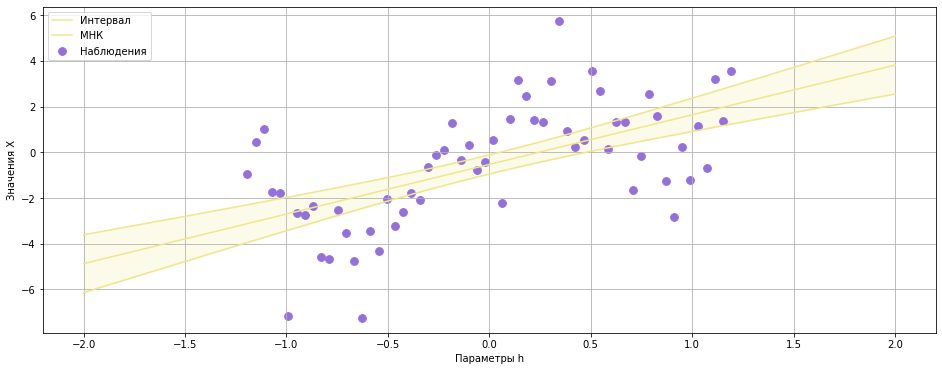

In [24]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, int_95_up, color='khaki', label='Интервал')
ax.plot(t, int_95_down, color='khaki')
ax.fill_between(t, int_95_up, int_95_down, color='khaki', alpha=0.2) 
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.plot(t, Xmnk_1, color='khaki', label='МНК')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [25]:
sigma_2 = [np.dot(np.dot(np.array([1, i]), cov_matrix), np.array([[1], [i]]))[0] for i in t]
sigma_2 = np.sqrt(sigma_2) * 1.28

In [26]:
int_80_up = [(Xmnk_1[i] + sigma_2[i]) for i in range(len(t))]
int_80_down = [(Xmnk_1[i] - sigma_2[i]) for i in range(len(t))]

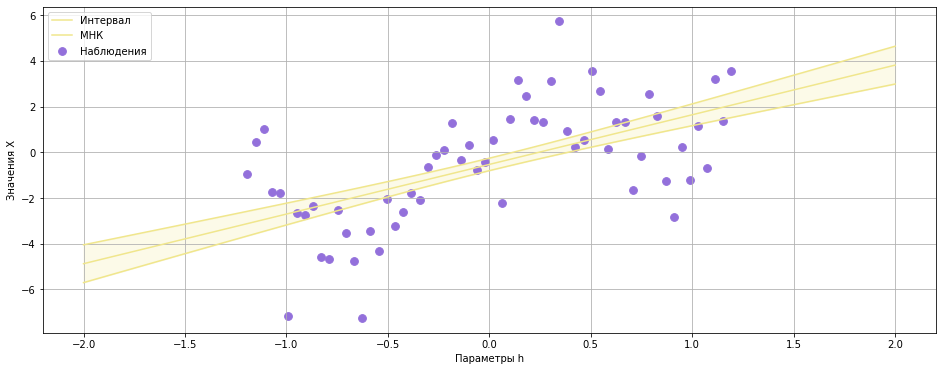

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, int_80_up, color='khaki', label='Интервал')
ax.plot(t, int_80_down, color='khaki')
ax.fill_between(t, int_80_up, int_80_down, color='khaki', alpha=0.2) 
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.plot(t, Xmnk_1, color='khaki', label='МНК')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

$\Large -\; Построить\; оценку\; метода\; наименьших\; модулей:$

$\large Для \: построения \: МНМ-оценки \: для \: выбранной \: модели \: я \: использовал \: квантильную \: регрессию \: со \: значением \: α=0.5.$

In [28]:
 reg = QuantileRegressor(quantile=0.5, alpha=0)

In [29]:
reg.fit(H, df.x)

QuantileRegressor(alpha=0)

In [30]:
tetha_MNM = reg.coef_

In [31]:
print('МНM-оценка:', tetha_MNM[0], tetha_MNM[1])

МНM-оценка: -0.20224671552378415 2.3813878414275225


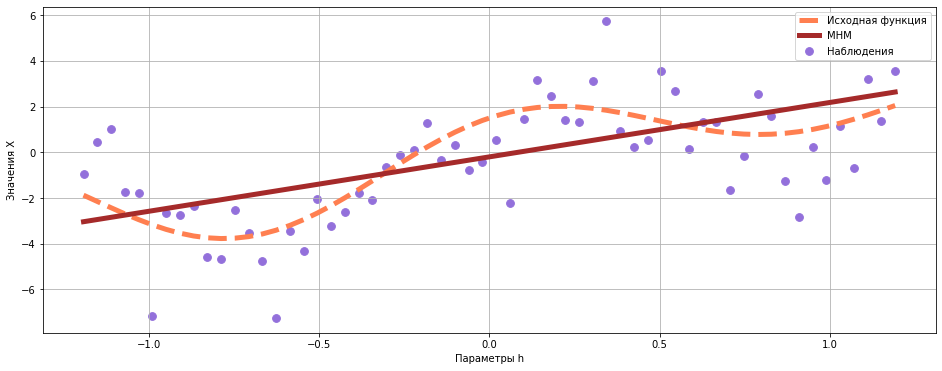

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['t'], df['X_true'], '--',color='coral', linewidth = 5, label='Исходная функция')
ax.plot(df['t'], [tetha_MNM[0] + tetha_MNM[1]*i for i in df.t], color='brown', linewidth = 5, label='МНM')
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [33]:
e = df.x - np.array([tetha_MNM[0] + tetha_MNM[1]*i for i in df.t])

In [34]:
e2 = e**2

In [35]:
sigmae2 = e2.sum()/(k-2)
print(f'Несмещенная оценка квадратов ошибки для МНM - {sigmae2}')

Несмещенная оценка квадратов ошибки для МНM - 2.812562558109693


$\Large -\; Оценить\; качество\; построенных\; регрессий\; на\; тестовой\; выборке:$

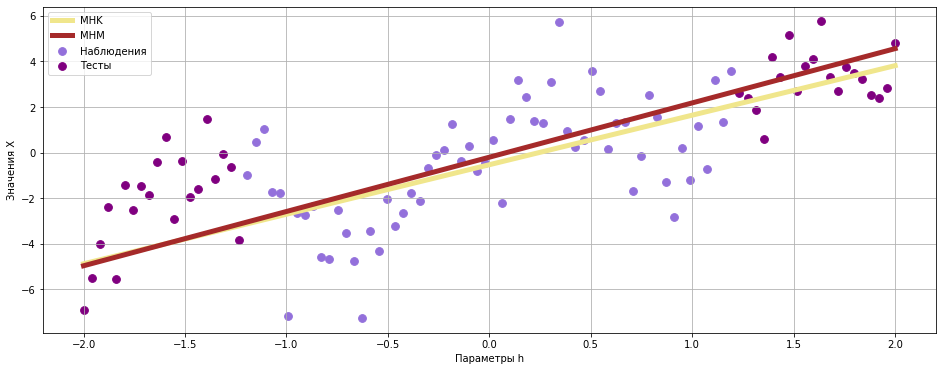

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df_test['t'], df_test['x'], color='purple', s=60, label='Тесты')
ax.plot(t, [tetha[0] + tetha[1]*i for i in t], color='khaki', linewidth = 5, label='МНK')
ax.plot(t, [tetha_MNM[0] + tetha_MNM[1]*i for i in t], color='brown', linewidth = 5, label='МНM')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [37]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
t,-2.000000,-1.959596,-1.919192,-1.878788,-1.838384,-1.797980,-1.757576,-1.717172,-1.676768,-1.636364,...,1.636364,1.676768,1.717172,1.757576,1.797980,1.838384,1.878788,1.919192,1.959596,2.000000
e,-2.947741,-2.015289,-0.941866,0.254031,-3.270297,0.492599,-0.965365,-0.182704,-0.826757,0.409987,...,2.009857,-0.440639,-1.071631,-0.013538,-0.255151,-0.486510,-1.121627,-1.191364,-0.695439,1.310375
x,-6.886575,-5.517620,-4.014078,-2.402316,-5.532617,-1.404646,-2.532966,-1.461771,-1.863156,-0.433317,...,5.750574,3.330253,2.707742,3.755013,3.486329,3.215261,2.531871,2.409711,2.853684,4.812709


In [38]:
df_test['Xmnk'] = np.array([tetha[0] + tetha[1]*i for i in df_test.t])
df_test['Xmnm'] = np.array([tetha_MNM[0] + tetha_MNM[1]*i for i in df_test.t])

In [39]:
e_mnk = df_test.x - df_test.Xmnk
e_mnm = df_test.x - df_test.Xmnm

In [40]:
mse_mnk = (e_mnk**2).sum()/40
mse_mnm = (e_mnm**2).sum()/40

In [41]:
print(f'MSE на тесте для МНК - {mse_mnk}')
print(f'MSE на тесте для МНM - {mse_mnm}')

MSE на тесте для МНК - 4.232402056048923
MSE на тесте для МНM - 4.24110521551521


$\large По \: полученным \: результатам \: видно, \: что \: МНМ-оценка \: лучшим \: образом \: предсказала \: значения \: на \: тесте. \: По \: графику \: это \: можно \: подтвердить, \: ведь \: слева \: коричневая \: линия \: проходит \: ближе \: к \: истинным \: наблюдениям.$

$\Large Для\; остатков\; \hat{e_k} = X_k - \hat{X_k}:$

$\Large - Построить \; гистограмму\; и \; ядерную\; оценку$

<AxesSubplot:xlabel='X_true-Xmnk', ylabel='Count'>

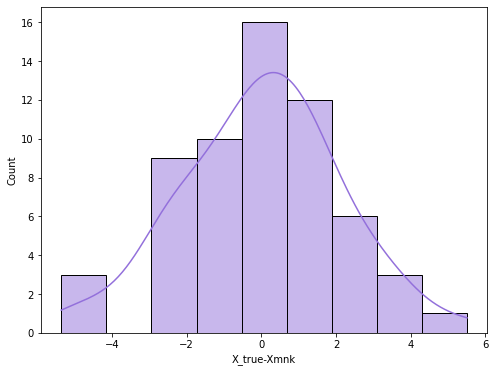

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x="X_true-Xmnk", kde=True, color='mediumpurple')

### Критерий Дагостини

In [43]:
res = normaltest(df['X_true-Xmnk'])
if res.pvalue > 0.05:
    print('Есть оcнования считать, что ошибки имеют нормальное распределение')
else:
    print('Ошибки не имеют нормальное распределение')

Есть оcнования считать, что ошибки имеют нормальное распределение


### Критерий Дарбина-Уотсона

In [44]:
e__ = []
for i in range(1, df.shape[0]):
    e__.append((df['X_true-Xmnk'][i] - df['X_true-Xmnk'][i-1])**2)
DW = sum(e__)/df['(X_true-Xmnk)^2'].sum()
print(f'Значение Дарбина-Уотсона = {DW}')

Значение Дарбина-Уотсона = 0.9741712652152426


In [45]:
dl = 1.51
du = 1.65
if 0 < DW < dl:
    print('Есть положительная корреляция')
elif dl < DW < du:
    print('Гипотиза о наличии корреляции не отвергается и не принимается')
elif du < DW < 4-du:
    print('Нет корреляции')
elif 4-du < DW < 4-dl:
    print('Гипотиза о наличии корреляции не отвергается и не принимается') 
elif 4-dl < DW < 4:
    print('Есть положительная корреляция')

Есть положительная корреляция


### Критерий Бартлетта

In [46]:
a = df['X_true-Xmnk'].to_numpy()
a = a[0:60:3]
b = a[1:60:3]
c = a[2:60:3]
res = bartlett(a, b, c)
if res.pvalue > 0.05:
    print('Есть основания считать, что остатки равномерно разбросаны')
else:
    print('Ошибки не имеют нормальное распределение')

Есть основания считать, что остатки равномерно разбросаны


$\large Согласно \: каждому \: из \: критериев \: мы \: можем \: сделать \: вывод. \: Первый \: критерий \: был \: критерий \: Дагостини, \: на \: основании \: которого \: определяется \: наличие \: оснований \: для \: нормального \: распределения. \: Получилось, \: что \: у \: нас \: есть \: основания \: считать, \: что \: ошибки \: имеют \: нормальное \: распределение. \: С \: помощью \: критерия \: Дарбина-Уотсона \: необходимо \: определить \: наличие \: автокорреляции. \: Согласно \: этому \: критерию \: у \: нас \: получилось \: значение \: 0.9, \: это \: попадает \: в \: первую \: область, \: что \: следует, \: что \: у \: нас \: присутствует \: положительная \: корреляция \: (ρ≠0). \: С \: помощью \: критерия \: Бартлетта \: мы \: пытались \: определить \: наличие \: гетероскедастичности. \: По \: результатам \: получилось, \: что \: у \: нас \: есть \: основания, \: что \: остатки \: равномерно \: разбросаны.$

## 2.3 Полиномиальная регрессия

$\large Первый \: способ - с.к-погрешность$

In [47]:
er1 = 2
er2 = 1
i = 2
while er1 - er2 > 0.00001:
    poly_reg=PolynomialFeatures(degree = i)     
    X_poly=poly_reg.fit_transform(np.resize(df.t, (60,1)))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,df.x)
    y_pred = lin_reg.predict(X_poly)
    er1 = er2
    er2 = (np.sum(df.x-y_pred)**2)/(60-i)**0.5
    i+=1
print(i)

4


In [48]:
tetha_poly1 = lin_reg.coef_

In [49]:
print('МНК-оценка:', tetha_poly1[0], tetha_poly1[1], tetha_poly1[2], tetha_poly1[3])

МНК-оценка: 0.0 5.104248338580225 -0.6061627956691069 -3.3270624387755325


$\large Получившееся \: значение \: параметра \: получилось \: равное \: 4 \: => \: Полином \: 3 \: степени. \: Выведем \: график, \: которые \: будем \: еще \: и \: включать \: значения \: тестовой \: выборки.$

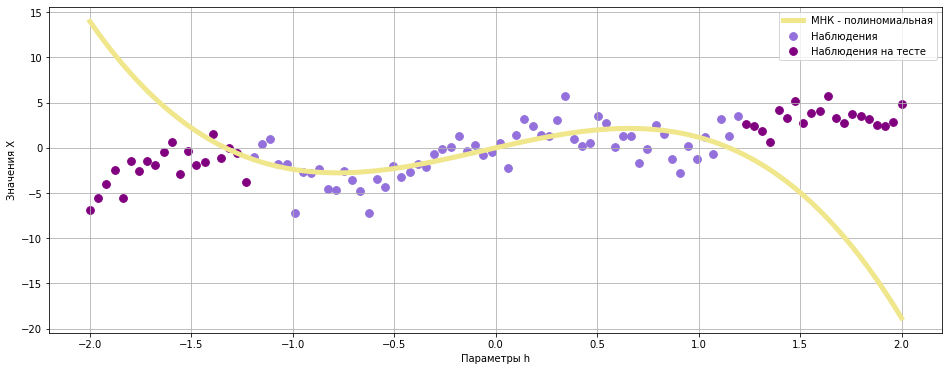

In [50]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, [tetha_poly1[0] + tetha_poly1[1]*i + tetha_poly1[2]*i**2 + tetha_poly1[3]*i**3 for i in t], color='khaki', linewidth = 5, label='МНК - полиномиальная')
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df_test['t'], df_test['x'], color='purple', s=60, label='Наблюдения на тесте')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

$\large Как \: можно \: заметить, \: справой \: стороны \: прогноз \: очень \: плохой. \: Хоть \: и \: на \: тренировочных \: значениях \: было \: хорошее \: значение. \: На \: тесте \: будет \: очень \: большая \: ошибка. \: Попробуем \: подобрать \: параметр \: с \: помощью \: сравнения \: MSE \: на \: тесте.$

$\large Второй \: способ \: MSE \; на\; тесте$

In [54]:
Mse1 = 2
Mse2 = 1
i = 2
while Mse1 - Mse2 > 0.00001:
    poly_reg=PolynomialFeatures(degree = i)     
    X_poly=poly_reg.fit_transform(np.resize(df.t, (60,1)))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,df.x)
    X_poly=poly_reg.fit_transform(np.resize(df_test.t, (40,1)))
    y_pred = lin_reg.predict(X_poly)
    Mse1 = Mse2
    Mse2 = (np.mean(df_test.x-y_pred)**2)
    i+=1
print(i)

3


In [55]:
tetha_poly2 = lin_reg.coef_
print('МНК-оценка:', tetha_poly2[0], tetha_poly2[1], tetha_poly2[2])

МНК-оценка: 0.0 2.1732017187084285 -0.6061627956691091


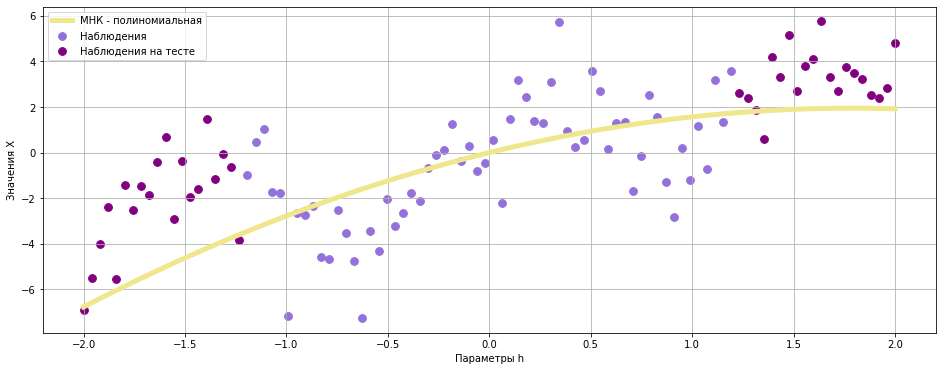

In [56]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, [tetha_poly2[0] + tetha_poly2[1]*i + tetha_poly2[2]*i**2 for i in t], color='khaki', linewidth = 5, label='МНК - полиномиальная')
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df_test['t'], df_test['x'], color='purple', s=60, label='Наблюдения на тесте')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

$\large Я \: выберу \: значение \: p \: = \: 3, \: потому \: что \: видно, \: что \: на \: тесте \: у \: нас \: получится \: наилучшее \: значение.$

In [57]:
poly_reg=PolynomialFeatures(degree = 3)     
X_poly=poly_reg.fit_transform(np.resize(df.t, (60,1)))
lin_reg = LinearRegression()
lin_reg.fit(X_poly,df.x)
y_pred = lin_reg.predict(X_poly)

In [58]:
a = df.x - y_pred

In [59]:
sigma_e2 = np.array([a[i]**2 for i in range(len(a))]).sum()/(60-3)
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_e2}')

Несмещенная оценка квадратов ошибки для МНК - 3.783252135910052


<AxesSubplot:xlabel='x', ylabel='Count'>

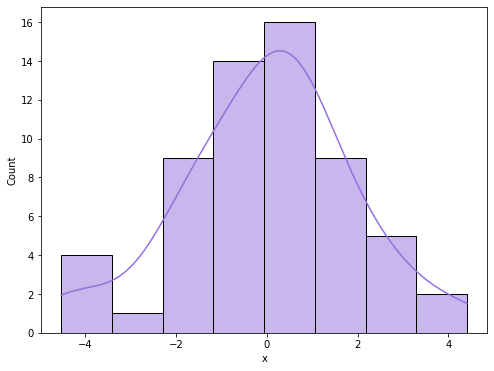

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=a, kde=True, color='mediumpurple')

### Критерий Дагостини

In [62]:
res = normaltest(a)
if res.pvalue > 0.05:
    print('Есть оcнования считать, что ошибки имеют нормальное распределение')
else:
    print('Ошибки не имеют нормальное распределение')

Есть оcнования считать, что ошибки имеют нормальное распределение


### Критерий Дарбина-Уотсона

In [63]:
e__ = []
for i in range(1, a.shape[0]):
    e__.append((a[i] - a[i-1])**2)
DW = sum(e__)/sum([a[i]**2 for i in range(len(a))])
print(f'Значение Дарбина-Уотсона = {DW}')

Значение Дарбина-Уотсона = 1.2188379116161898


In [64]:
dl = 1.48
du = 1.69
if 0 < DW < dl:
    print('Есть положительная корреляция')
elif dl < DW < du:
    print('Гипотиза о наличии корреляции не отвергается и не принимается')
elif du < DW < 4-du:
    print('Нет корреляции')
elif 4-du < DW < 4-dl:
    print('Гипотиза о наличии корреляции не отвергается и не принимается') 
elif 4-dl < DW < 4:
    print('Есть положительная корреляция')

Есть положительная корреляция


### Критерий Бартлетта

In [65]:
a1 = a[0:60:3]
b = a[1:60:3]
c = a[2:60:3]
res = bartlett(a1, b, c)
if res.pvalue > 0.05:
    print('Есть основания считать, что остатки равномерно разбросаны')
else:
    print('Ошибки не имеют нормальное распределение')

Есть основания считать, что остатки равномерно разбросаны


$\large По \: критерию \: Дагостини \: вышло, \: что \: у \: нас \: есть \: основания \: считать \: ошибки \: нормально \: распределенными. \: По \: Дарбину-Уотсону \: значение \: попало \: в \: 1 \: область, \: из \: чего \: следует, \: что \: есть \: положительная \: корреляция. \: По \: критерию \: Бартлетта \: – \: есть \: основания, \: что \: остатки \: равномерно \: разбросаны.$

$\large -\; Проверка\; мультиколлинеарности$

In [68]:
W = np.dot(X_poly.T, X_poly)
con = np.linalg.cond(W)
print(f'cond(W) = {con}')
if con > 1:
    print('Матрицу следует признать мультиколлинеарной')
else:
    print('Нет мультиколлинеарной')

cond(W) = 32.72621002458616
Матрицу следует признать мультиколлинеарной


$\large По \: полученному \: значению \: cond(W) \: получилось, \: что \: матрица \: является \: мультиколлиниарной, \: поэтому \: необходимо \: использовать \: ридж-оценку, \: чтобы \: избавиться \: от \: нее.$

$\large - Ridge\;-\;оценка$

In [69]:
poly_reg=PolynomialFeatures(degree = 3)     
X_poly=poly_reg.fit_transform(np.resize(df.t, (60,1)))
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly, df.x)
y_pred = ridge.predict(X_poly)

In [70]:
tetha_ridge = ridge.coef_

In [71]:
print('МНК-оценка Ридж:', tetha_ridge[0], tetha_ridge[1], tetha_ridge[2])

МНК-оценка Ридж: 0.0 3.8612196607556006 -0.5576576100126747


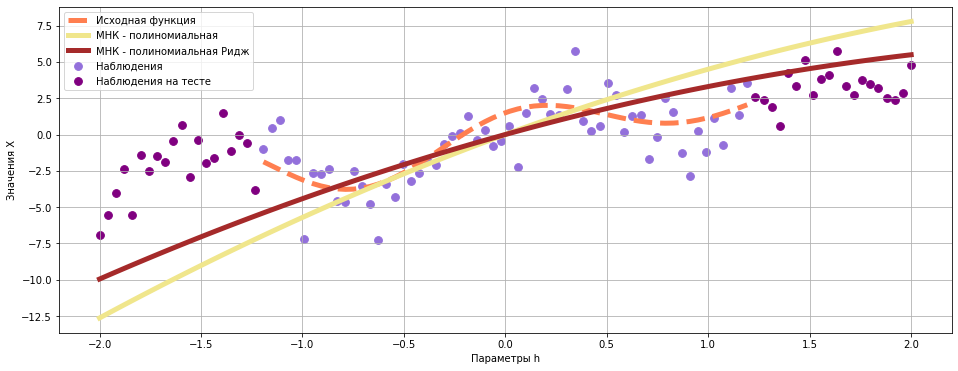

In [72]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['t'], df['X_true'], '--',color='coral', linewidth = 5, label='Исходная функция')
ax.plot(t, [tetha_poly1[0] + tetha_poly1[1]*i + tetha_poly1[2]*i**2 for i in t], color='khaki', linewidth = 5, label='МНК - полиномиальная')
ax.plot(t, [tetha_ridge[0] + tetha_ridge[1]*i + tetha_ridge[2]*i**2 for i in t], color='brown', linewidth = 5, label='МНК - полиномиальная Ридж')
ax.scatter(df['t'], df['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df_test['t'], df_test['x'], color='purple', s=60, label='Наблюдения на тесте')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [73]:
a = df.x - y_pred
sigma_e2 = np.array([a[i]**2 for i in range(len(a))]).sum()/(60-3)
print(f'Несмещенная оценка квадратов ошибки для МНК метод Ридж - {sigma_e2}')

Несмещенная оценка квадратов ошибки для МНК метод Ридж - 3.9136483874141956


In [74]:
xmnkmnk = np.array([[tetha_ridge[0] + tetha_ridge[1]*i + tetha_ridge[2]*i**2 for i in df_test.t]])

In [75]:
a = df_test.x.to_numpy() - xmnkmnk

In [76]:
a2 = np.array([a[i]**2 for i in range(len(a))])

In [77]:
print(f'MSE на тесте для МНК - {a2.sum()/40}')

MSE на тесте для МНК - 18.778892849066427


$\large Хоть \: и \: оценка \: квадратов \: ошибок \: на \: тренировочной \: выборке \: увеличилось, \: но \: как \: видно \:\: из \: графика, \: из-за \: использования \: ридж-оценки \: построенная \: линия \: притянулась \: к \: левым \: тестовым \: значениям, \: что \: улучшило \: прогноз \: модель. \: Поэтому \: наилучшей \: полиномиальной \: моделью \: оказалась \: Y_k= θ_0 + θ_1 h_k + θ_2 {h_k}^2 \: с \: использованием \: ридж-оценки. \: Но \: в \: сравнении \: с \: первой \: моделью, \: эта \: модель \: проигрывает \: МНК \: и \: МНМ \: оценкам. \: Значение \: MSE \: получилось \: 18.8$

## 2.4. Регрессия для наблюдений с выбросами

In [79]:
delta = 0.08
e0 = np.array(np.random.normal(mu, sigma, 100))
e1 = np.array(np.random.normal(mu, 10*sigma, 100))
e = (1-delta)*e0 + delta*e1

In [80]:
df2 = pd.DataFrame(t[20:80], columns=['t'])
df2_test = pd.DataFrame(np.append(t[0:20], t[80:100]), columns=['t'])
df2['e'] = e[20:80]
df2_test['e']= np.append(e[0:20], e[80:100])
x = np.array([f_(t[i])+e[i] for i in range(len(t))])
df2['x'] = x[20:80]
df2_test['x']= np.append(x[0:20], x[80:100])

In [81]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,-0.999134,-2.423368,2.349522,-1.190705,3.614276,2.990680,0.432753,-0.296234,-2.733204,0.357667,...,-1.169585,-2.428592,1.300362,3.202984,0.063866,1.012708,-0.605727,0.863798,0.823213,1.428523
x,-2.879430,-4.577721,-0.079257,-3.886356,0.667000,-0.185688,-2.943469,-3.837099,-6.398399,-3.387426,...,-0.380463,-1.598443,2.200995,4.202600,1.189195,2.287968,0.840510,2.498327,2.659182,3.474598


In [82]:
df2_test.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
t,-2.000000,-1.959596,-1.919192,-1.878788,-1.838384,-1.797980,-1.757576,-1.717172,-1.676768,-1.636364,...,1.636364,1.676768,1.717172,1.757576,1.797980,1.838384,1.878788,1.919192,1.959596,2.000000
e,-4.088875,-0.532669,-2.505549,2.828827,1.375443,-1.558321,-1.412272,0.340437,0.339257,-0.899080,...,-1.519752,-1.748918,0.859438,-1.379213,-1.344991,1.666048,2.701141,-0.358654,0.865191,0.202746
x,-8.027710,-4.035001,-5.577761,0.172480,-0.886876,-3.455567,-2.979873,-0.938630,-0.697142,-1.742385,...,2.220965,2.021975,4.638811,2.389338,2.396489,5.367819,6.354640,3.242421,4.414314,3.705080


$$ \Large Для \; модели \; Y_k = \theta_0 + \theta_1 \cdot h_k, \; k = 1 ..60 \;$$
$$$$
$ \Large -\; найти \; МНК-оцеку \; неизвестных \; параметров$


$ \Large Найдем \; ее \; по \; формуле:$
$$\Large \hat{\Theta} = (H^T \cdot H)^{-1} H^T Y$$

In [83]:
H_T = np.array([[1 for i in range(60)], df['t']])
H = H_T.T
H.shape, H_T.shape
W = np.dot(H_T, H)
W = np.linalg.inv(W)
HX = np.dot(H_T, df2.x)
tetha = np.dot(W, HX)
print('МНК-оценка:', tetha[0], tetha[1])

МНК-оценка: -0.2545524223805595 2.658961772560884


In [84]:
Xmnk = np.array([tetha[0] + tetha[1]*i for i in df.t])
X_true = np.array([f_(i) for i in df.t])
df2['Xmnk'] = Xmnk
df2['X_true'] = X_true
df2.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,-0.999134,-2.423368,2.349522,-1.190705,3.614276,2.990680,0.432753,-0.296234,-2.733204,0.357667,...,-1.169585,-2.428592,1.300362,3.202984,0.063866,1.012708,-0.605727,0.863798,0.823213,1.428523
x,-2.879430,-4.577721,-0.079257,-3.886356,0.667000,-0.185688,-2.943469,-3.837099,-6.398399,-3.387426,...,-0.380463,-1.598443,2.200995,4.202600,1.189195,2.287968,0.840510,2.498327,2.659182,3.474598
Xmnk,-3.423820,-3.316387,-3.208954,-3.101522,-2.994089,-2.886656,-2.779223,-2.671790,-2.564358,-2.456925,...,1.947820,2.055253,2.162686,2.270118,2.377551,2.484984,2.592417,2.699850,2.807282,2.914715
X_true,-1.880296,-2.154353,-2.428779,-2.695651,-2.947276,-3.176368,-3.376222,-3.540866,-3.665195,-3.745092,...,0.789122,0.830149,0.900633,0.999616,1.125329,1.275260,1.446237,1.634529,1.835969,2.046075


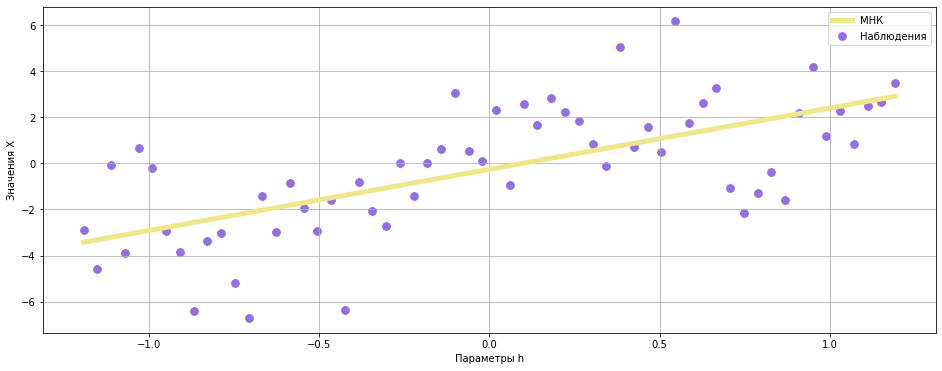

In [85]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df2['t'], df2['Xmnk'], color='khaki', linewidth = 5, label='МНК')
ax.scatter(df2['t'], df2['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

$\Large Для\; остатков\; \hat{e_k} = X_k - \hat{X_k}:$

$\Large - Построить \; гистограмму\; и \; ядерную\; оценку$

In [86]:
df2['X_true-Xmnk'] = (df2.x - df2['Xmnk'])
df2['(X_true-Xmnk)^2'] = (df2.x - df2['Xmnk'])**2
df2.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,-0.999134,-2.423368,2.349522,-1.190705,3.614276,2.990680,0.432753,-0.296234,-2.733204,0.357667,...,-1.169585,-2.428592,1.300362,3.202984,0.063866,1.012708,-0.605727,0.863798,0.823213,1.428523
x,-2.879430,-4.577721,-0.079257,-3.886356,0.667000,-0.185688,-2.943469,-3.837099,-6.398399,-3.387426,...,-0.380463,-1.598443,2.200995,4.202600,1.189195,2.287968,0.840510,2.498327,2.659182,3.474598
Xmnk,-3.423820,-3.316387,-3.208954,-3.101522,-2.994089,-2.886656,-2.779223,-2.671790,-2.564358,-2.456925,...,1.947820,2.055253,2.162686,2.270118,2.377551,2.484984,2.592417,2.699850,2.807282,2.914715
X_true,-1.880296,-2.154353,-2.428779,-2.695651,-2.947276,-3.176368,-3.376222,-3.540866,-3.665195,-3.745092,...,0.789122,0.830149,0.900633,0.999616,1.125329,1.275260,1.446237,1.634529,1.835969,2.046075
X_true-Xmnk,0.544390,-1.261334,3.129697,-0.784835,3.661089,2.700968,-0.164245,-1.165309,-3.834042,-0.930501,...,-2.328282,-3.653695,0.038309,1.932481,-1.188356,-0.197016,-1.751907,-0.201522,-0.148101,0.559883
(X_true-Xmnk)^2,0.296361,1.590964,9.795005,0.615966,13.403570,7.295229,0.026977,1.357944,14.699875,0.865832,...,5.420899,13.349490,0.001468,3.734485,1.412191,0.038815,3.069178,0.040611,0.021934,0.313469


In [87]:
sigma_e2 = df2['(X_true-Xmnk)^2'].sum()/(60-2)
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_e2}')

Несмещенная оценка квадратов ошибки для МНК - 4.614537281320333


<AxesSubplot:xlabel='X_true-Xmnk', ylabel='Count'>

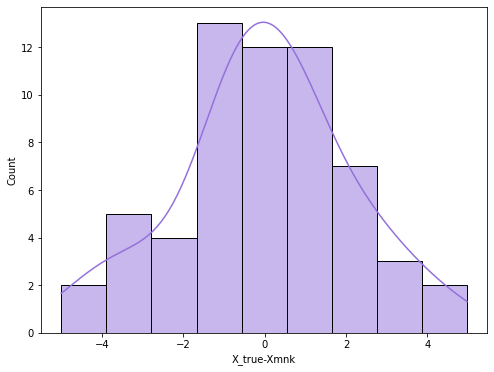

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df2, x='X_true-Xmnk', kde=True, color='mediumpurple')

### Критерий Дагостини

In [89]:
res = normaltest(df2['X_true-Xmnk'])
if res.pvalue > 0.05:
    print('Есть оcнования считать, что ошибки имеют нормальное распределение')
else:
    print('Ошибки не имеют нормальное распределение')

Есть оcнования считать, что ошибки имеют нормальное распределение


### Критерий Дарбина-Уотсона

In [90]:
e__ = []
for i in range(1, df2.shape[0]):
    e__.append((df2['X_true-Xmnk'][i] - df2['X_true-Xmnk'][i-1])**2)
DW = sum(e__)/df2['(X_true-Xmnk)^2'].sum()
print(f'Значение Дарбина-Уотсона = {DW}')

Значение Дарбина-Уотсона = 1.4887236384075972


In [91]:
dl = 1.51
du = 1.65
if 0 < DW < dl:
    print('Есть положительная корреляция')
elif dl < DW < du:
    print('Гипотиза о наличии корреляции не отвергается и не принимается')
elif du < DW < 4-du:
    print('Нет корреляции')
elif 4-du < DW < 4-dl:
    print('Гипотиза о наличии корреляции не отвергается и не принимается') 
elif 4-dl < DW < 4:
    print('Есть положительная корреляция')

Есть положительная корреляция


### Критерий Бартлетта

In [92]:
a = df2['X_true-Xmnk'].to_numpy()
a = a[0:60:3]
b = a[1:60:3]
c = a[2:60:3]
res = bartlett(a, b, c)
if res.pvalue > 0.05:
    print('Есть основания считать, что остатки равномерно разбросаны')
else:
    print('Ошибки не имеют нормальное распределение')

Есть основания считать, что остатки равномерно разбросаны


$\large По \: критерию \: Дагостини \: вышло, \: что \: у \: нас \: есть \: основания \: считать \: ошибки \: нормально \: распределенными. \: По \: Дарбину-Уотсону \: значение \: попало \: в \: 1 \: область, \: из \: чего \: следует, \: что \: есть \: положительная \: корреляция. \: По \: критерию \: Бартлетта \: – \: есть \: основания, \: что \: остатки \: равномерно \: разбросаны.$

### Отбросим выбросы

In [98]:
k = abs(df2['X_true-Xmnk']).median()
print(k)

1.1768325869149838


In [99]:
df_norm = df2[abs(df2['X_true-Xmnk']) < 2*k/0.675]
df_lol = df2[abs(df2['X_true-Xmnk']) > 2*k/0.675]

In [100]:
H_T = np.array([[1 for i in range(len(df_norm))], df_norm.t])
H = H_T.T
l = 60 - H.shape[0]
H.shape, H_T.shape, l

((51, 2), (2, 51), 9)

In [101]:
W = np.dot(H_T, H)
W = np.linalg.inv(W)
HX = np.dot(H_T, df_norm.x)
tetha_new = np.dot(W, HX)
print('МНК-оценка:', tetha_new[0], tetha_new[1])

МНК-оценка: -0.16605365296014135 2.5437147160171945


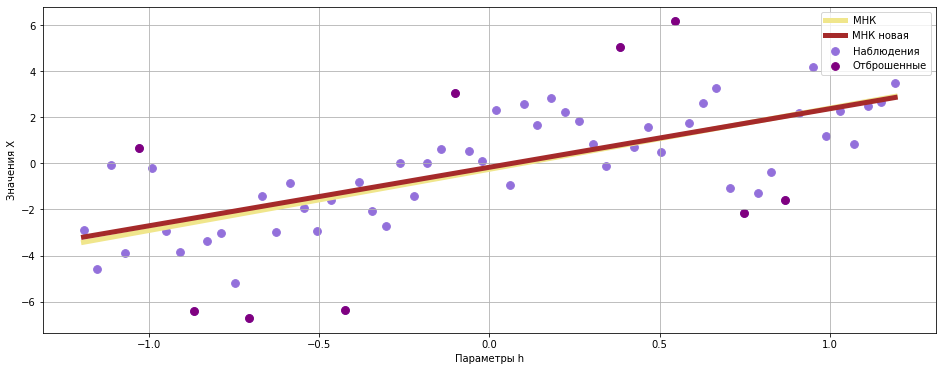

In [102]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df2['t'], df2['Xmnk'], color='khaki', linewidth = 5, label='МНК')
ax.plot(df2.t, [tetha_new[0] + tetha_new[1]*i for i in df2.t], color='brown', linewidth = 5, label='МНК новая')
ax.scatter(df2['t'], df2['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df_lol['t'], df_lol['x'], color='purple', s=60, label='Отброшенные')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [103]:
df_norm['Xmnk'] = np.array([tetha_new[0] + tetha_new[1]*i for i in df_norm.t])

In [104]:
df_norm['X_true-Xmnk'] = df_norm.x - df_norm['Xmnk']
df_norm['(X_true-Xmnk)^2'] = (df_norm.x - df_norm['Xmnk'])**2

In [105]:
df_norm.T

,0,1,2,3,5,6,7,9,10,11,...,49,50,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-0.989899,-0.949495,-0.909091,-0.828283,-0.787879,-0.747475,...,0.787879,0.828283,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,-0.999134,-2.423368,2.349522,-1.190705,2.990680,0.432753,-0.296234,0.357667,0.765355,-1.418208,...,-2.081143,-1.169585,1.300362,3.202984,0.063866,1.012708,-0.605727,0.863798,0.823213,1.428523
x,-2.879430,-4.577721,-0.079257,-3.886356,-0.185688,-2.943469,-3.837099,-3.387426,-3.012154,-5.178742,...,-1.303486,-0.380463,2.200995,4.202600,1.189195,2.287968,0.840510,2.498327,2.659182,3.474598
Xmnk,-3.197956,-3.095180,-2.992403,-2.889627,-2.684074,-2.581298,-2.478522,-2.272969,-2.170193,-2.067416,...,1.838085,1.940862,2.146414,2.249191,2.351967,2.454743,2.557520,2.660296,2.763072,2.865849
X_true,-1.880296,-2.154353,-2.428779,-2.695651,-3.176368,-3.376222,-3.540866,-3.745092,-3.777509,-3.760534,...,0.777656,0.789122,0.900633,0.999616,1.125329,1.275260,1.446237,1.634529,1.835969,2.046075
X_true-Xmnk,0.318526,-1.482542,2.913146,-0.996729,2.498386,-0.362171,-1.358578,-1.114457,-0.841961,-3.111325,...,-3.141571,-2.321324,0.054581,1.953409,-1.162772,-0.166776,-1.717010,-0.161969,-0.103891,0.608749
(X_true-Xmnk)^2,0.101459,2.197930,8.486421,0.993470,6.241935,0.131168,1.845733,1.242014,0.708899,9.680346,...,9.869471,5.388546,0.002979,3.815807,1.352039,0.027814,2.948123,0.026234,0.010793,0.370576


In [106]:
sigma_e2 = df_norm['(X_true-Xmnk)^2'].sum()/(H.shape[0]-2)
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_e2}')

Несмещенная оценка квадратов ошибки для МНК - 2.2154452547284293


$\Large Для\; остатков\; \hat{e_k} = X_k - \hat{X_k}:$

$\Large - Построить \; гистограмму\; и \; ядерную\; оценку$

<AxesSubplot:xlabel='X_true-Xmnk', ylabel='Count'>

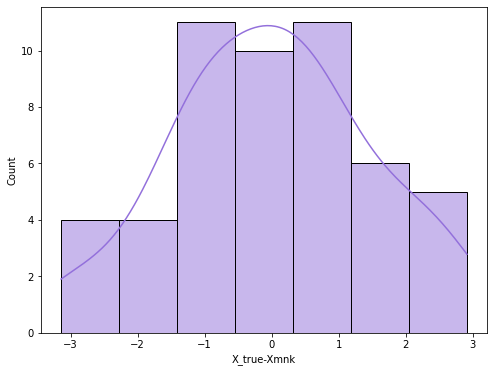

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_norm, x='X_true-Xmnk', kde=True, color='mediumpurple')

### Критерий Дагостини


In [108]:
res = normaltest(df_norm['X_true-Xmnk'])
if res.pvalue > 0.05:
    print('Есть оcнования считать, что ошибки имеют нормальное распределение')
else:
    print('Ошибки не имеют нормальное распределение')

Есть оcнования считать, что ошибки имеют нормальное распределение


### Критерий Дарбина-Уотсона

In [109]:
e_ = (df_norm.x - df_norm['Xmnk']).to_numpy()

In [110]:
e__ = []
for i in range(1, len(e_)):
    e__.append((e_[i] - e_[i-1])**2)
DW = sum(e__)/df_norm['(X_true-Xmnk)^2'].sum()
print(f'Значение Дарбина-Уотсона = {DW}')

Значение Дарбина-Уотсона = 1.7070391503821578


In [111]:
dl = 1.51 - l*0.004
du = 1.65 - l*0.02
du, dl

(1.47, 1.474)

In [112]:
if 0 < DW < dl:
    print('Есть положительная корреляция')
elif dl < DW < du:
    print('Гипотиза о наличии корреляции не отвергается и не принимается')
elif du < DW < 4-du:
    print('Нет корреляции')
elif 4-du < DW < 4-dl:
    print('Гипотиза о наличии корреляции не отвергается и не принимается') 
elif 4-dl < DW < 4:
    print('Есть положительная корреляция')

Нет корреляции


### Критерий Бартлетта

In [113]:
a = df_norm['X_true-Xmnk'].to_numpy()
a = a[0:51:3]
b = a[1:51:3]
c = a[2:51:3]
res = bartlett(a, b, c)
if res.pvalue > 0.05:
    print('Есть основания считать, что остатки равномерно разбросаны')
else:
    print('Ошибки не имеют нормальное распределение')

Есть основания считать, что остатки равномерно разбросаны


$\large По \: критерию \: Дагостини \: вышло, \: что \: у \: нас \: есть \: основания \: считать \: ошибки \: нормально \: распределенными. \: По \: Дарбину-Уотсону \: значение \: попало \: в \: 3 \: область, \: из \: чего \: следует, \: что \: нет \: корреляция. \: По \: критерию \: Бартлетта \: – \: есть \: основания, \: что \: остатки \: равномерно \: разбросаны.$

### Постороим МНМ-оценку

In [114]:
reg = QuantileRegressor(quantile=0.5, alpha=0)
reg.fit(H, df_norm.x)
tetha_MNM = reg.coef_
print('МНM-оценка:', tetha_MNM[0], tetha_MNM[1])

МНM-оценка: -0.14660330207976568 2.743621539343104


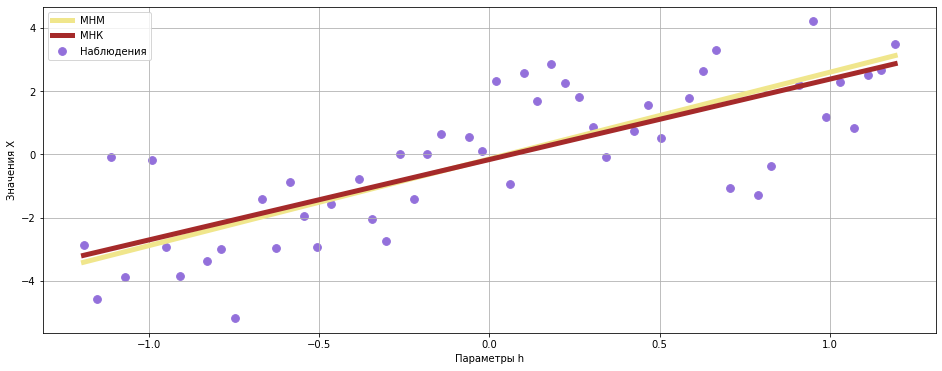

In [115]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df2['t'], [tetha_MNM[0] + tetha_MNM[1]*i for i in df2.t], color='khaki', linewidth = 5, label='МНМ')
ax.plot(df2.t, [tetha_new[0] + tetha_new[1]*i for i in df2.t], color='brown', linewidth = 5, label='МНК')
ax.scatter(df_norm['t'], df_norm['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [116]:
df_norm['Xmnm'] = np.array([tetha_MNM[0] + tetha_MNM[1]*i for i in df_norm.t])
df_norm['X_true-Xmnm'] = df_norm.x - df_norm['Xmnm']
df_norm['(X_true-Xmnm)^2'] = (df_norm.x - df_norm['Xmnm'])**2

$\Large Для\; остатков\; \hat{e_k} = X_k - \hat{X_k}:$
    $$$$
$\Large - Построить \; гистограмму\; и \; ядерную\; оценку$

<AxesSubplot:xlabel='X_true-Xmnm', ylabel='Count'>

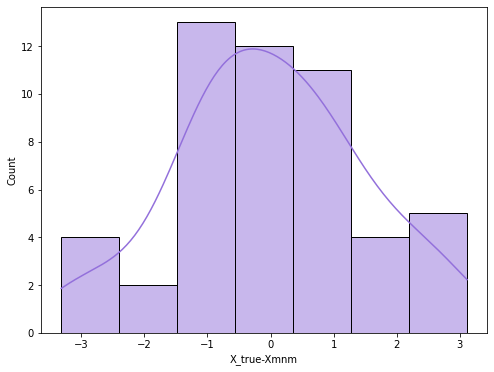

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_norm, x='X_true-Xmnm', kde=True, color='mediumpurple')

### Критерий Дагостини

In [119]:
res = normaltest(df_norm['X_true-Xmnm'])
if res.pvalue > 0.05:
    print('Есть оcнования считать, что ошибки имеют нормальное распределение')
else:
    print('Ошибки не имеют нормальное распределение')

Есть оcнования считать, что ошибки имеют нормальное распределение


### Критерий Дарбина-Уотсона

In [120]:
e_ = (df_norm.x - df_norm['Xmnk']).to_numpy()
e__ = []
for i in range(1, len(e_)):
    e__.append((e_[i] - e_[i-1])**2)
DW = sum(e__)/df_norm['(X_true-Xmnk)^2'].sum()
print(f'Значение Дарбина-Уотсона = {DW}')

Значение Дарбина-Уотсона = 1.7070391503821578


In [121]:
if 0 < DW < dl:
    print('Есть положительная корреляция')
elif dl < DW < du:
    print('Гипотиза о наличии корреляции не отвергается и не принимается')
elif du < DW < 4-du:
    print('Нет корреляции')
elif 4-du < DW < 4-dl:
    print('Гипотиза о наличии корреляции не отвергается и не принимается') 
elif 4-dl < DW < 4:
    print('Есть положительная корреляция')

Нет корреляции


### Критерий Бартлетта

In [122]:
a = df_norm['X_true-Xmnm'].to_numpy()
a = a[0:51:3]
b = a[1:51:3]
c = a[2:51:3]
res = bartlett(a, b, c)
if res.pvalue > 0.05:
    print('Есть основания считать, что остатки равномерно разбросаны')
else:
    print('Ошибки не имеют нормальное распределение')

Есть основания считать, что остатки равномерно разбросаны


$\large По \: критерию \: Дагостини \: вышло, \: что \: у \: нас \: есть \: основания \: считать \: ошибки \: нормально \: распределенными. \: По \: Дарбину-Уотсону \: значение \: попало \: в \: 3 \: область, \: из \: чего \: следует, \: что \: нет \: корреляция. \: По \: критерию \: Бартлетта \: – \: есть \: основания, \: что \: остатки \: равномерно \: разбросаны.$

## 2.5. Квантильная регрессия

In [123]:
df3 = pd.DataFrame(t[20:80], columns=['t'])
df3_test = pd.DataFrame(np.append(t[0:20], t[80:100]), columns=['t'])

In [124]:
e = np.random.normal(mu, sigma, 100)

In [125]:
neg_e = []
for e_ in e:
    if e_ < 0:
        neg_e.append(e_)
len(neg_e)

45

In [126]:
neg_e = random.sample(neg_e, int(len(neg_e)*0.9))
for i, e_ in enumerate(e):
    if e_ in neg_e:
        e[i] = -e_

In [127]:
df3['e'] = e[20:80]
df3_test['e']= np.append(e[0:20], e[80:100])
x = np.array([f_(t[i])+e[i] for i in range(len(t))])
df3['x'] = x[20:80]
df3_test['x']= np.append(x[0:20], x[80:100])

In [128]:
df3.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-0.989899,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,1.746388,0.234178,2.846826,1.030638,2.133751,1.269832,-0.401794,0.062231,1.699233,1.529659,...,0.781451,1.014415,0.247455,0.934949,1.018324,1.110069,1.386567,0.297805,0.533025,1.616558
x,-0.133908,-1.920175,0.418047,-1.665013,-0.813525,-1.906536,-3.778017,-3.478634,-1.965963,-2.215433,...,1.570573,1.844564,1.148088,1.934565,2.143653,2.385329,2.832804,1.932335,2.368994,3.662633


In [129]:
df3_test.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
t,-2.000000,-1.959596,-1.919192,-1.878788,-1.838384,-1.797980,-1.757576,-1.717172,-1.676768,-1.636364,...,1.636364,1.676768,1.717172,1.757576,1.79798,1.838384,1.878788,1.919192,1.959596,2.000000
e,0.861239,1.638488,0.287031,1.029357,0.904099,0.644103,0.233442,0.843013,1.073111,1.009790,...,0.162996,0.421232,0.138701,1.062464,0.28176,1.259252,1.246083,1.001099,1.228055,0.484800
x,-3.077596,-1.863843,-2.785181,-1.626989,-1.358220,-1.253142,-1.334159,-0.436055,0.036712,0.166485,...,3.903713,4.192125,3.918074,4.831016,4.02324,4.961023,4.899582,4.602174,4.777178,3.987134


$\large Построит \; МНК-оценку \; и \; МНМ-оценку: $

In [130]:
H_T = np.array([[1 for i in range(60)], df3['t']])
H2 = np.array([[1 for i in range(100)], t]).T
H = H_T.T
H.shape, H_T.shape
W = np.dot(H_T, H)
W = np.linalg.inv(W)
HX = np.dot(H_T, df3.x)
tetha = np.dot(W, HX)
print('МНК-оценка:', tetha[0], tetha[1])

МНК-оценка: 0.6698793120607182 2.5097989497158015


In [131]:
reg = QuantileRegressor(quantile=0.5, alpha=0)
reg.fit(H, df3.x)
tetha_MNM = reg.coef_
x_mnm = reg.predict(H)
x_mnm2 = reg.predict(H2)

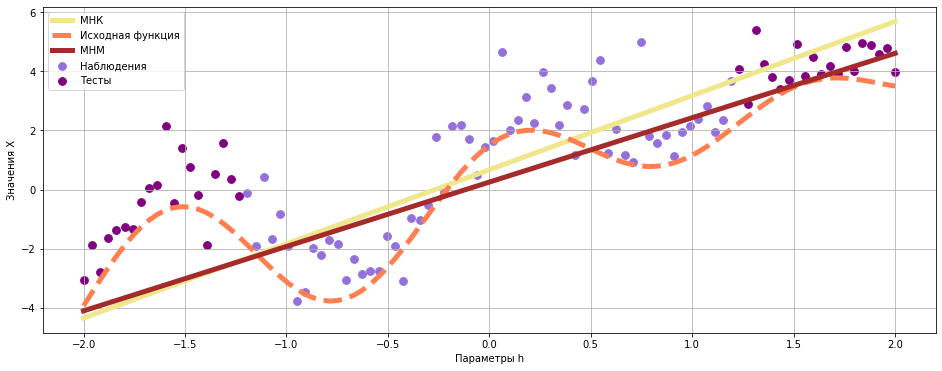

In [134]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, [tetha[0] + tetha[1]*i for i in t], color='khaki', linewidth = 5, label='МНК')
ax.plot(t, [f_(i) for i in t], '--',color='coral', linewidth = 5, label='Исходная функция')
ax.plot(t, x_mnm2, color='brown', linewidth = 5, label='МНМ')
ax.scatter(df3['t'], df3['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df3_test['t'], df3_test['x'], color='purple', s=60, label='Тесты')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()

In [135]:
df3['Xmnk'] = np.array([tetha[0] + tetha[1]*i for i in df3.t])
df3['Xmnm'] = x_mnm
df3['X_true-Xmnk'] = (df3.x - df3['Xmnk'])
df3['X_true-Xmnm'] = (df3.x - df3['Xmnm'])
df3['(X_true-Xmnk)^2'] = (df3.x - df3['Xmnk'])**2
df3['(X_true-Xmnm)^2'] = (df3.x - df3['Xmnm'])**2

In [136]:
df3.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
t,-1.191919,-1.151515,-1.111111,-1.070707,-1.030303,-9.898990e-01,-0.949495,-0.909091,-0.868687,-0.828283,...,0.828283,0.868687,0.909091,0.949495,0.989899,1.030303,1.070707,1.111111,1.151515,1.191919
e,1.746388,0.234178,2.846826,1.030638,2.133751,1.269832e+00,-0.401794,0.062231,1.699233,1.529659,...,0.781451,1.014415,0.247455,0.934949,1.018324,1.110069,1.386567,0.297805,0.533025,1.616558
x,-0.133908,-1.920175,0.418047,-1.665013,-0.813525,-1.906536e+00,-3.778017,-3.478634,-1.965963,-2.215433,...,1.570573,1.844564,1.148088,1.934565,2.143653,2.385329,2.832804,1.932335,2.368994,3.662633
Xmnk,-2.321598,-2.220192,-2.118786,-2.017380,-1.915974,-1.814568e+00,-1.713162,-1.611756,-1.510350,-1.408944,...,2.748703,2.850109,2.951515,3.052921,3.154327,3.255733,3.357139,3.458545,3.559951,3.661357
Xmnm,-2.346977,-2.258889,-2.170800,-2.082712,-1.994624,-1.906536e+00,-1.818447,-1.730359,-1.642271,-1.554182,...,2.057437,2.145526,2.233614,2.321702,2.409790,2.497879,2.585967,2.674055,2.762144,2.850232
X_true-Xmnk,2.187690,0.300017,2.536834,0.352367,1.102450,-9.196744e-02,-2.064854,-1.866878,-0.455613,-0.806489,...,-1.178129,-1.005545,-1.803427,-1.118356,-1.010674,-0.870404,-0.524334,-1.526210,-1.190957,0.001276
X_true-Xmnm,2.213069,0.338713,2.588848,0.417699,1.181099,-1.199263e-12,-1.959569,-1.748275,-0.323692,-0.661251,...,-0.486864,-0.300961,-1.085526,-0.387137,-0.266138,-0.112550,0.246837,-0.741720,-0.393150,0.812401
(X_true-Xmnk)^2,4.785987,0.090010,6.435525,0.124163,1.215395,8.458010e-03,4.263624,3.485233,0.207583,0.650424,...,1.387988,1.011120,3.252349,1.250720,1.021462,0.757603,0.274927,2.329317,1.418378,0.000002
(X_true-Xmnm)^2,4.897673,0.114727,6.702133,0.174473,1.394995,1.438232e-24,3.839912,3.056466,0.104777,0.437252,...,0.237036,0.090578,1.178367,0.149875,0.070829,0.012667,0.060929,0.550149,0.154567,0.659996


In [137]:
sigma_mnke2 = df3['(X_true-Xmnk)^2'].sum()/(60-2) 
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_mnke2}')

Несмещенная оценка квадратов ошибки для МНК - 2.3118902325552777


In [138]:
sigma_mnme2 = df3['(X_true-Xmnm)^2'].sum()/(60-2) 
print(f'Несмещенная оценка квадратов ошибки для МНК - {sigma_mnme2}')

Несмещенная оценка квадратов ошибки для МНК - 2.5478851908879143


<AxesSubplot:xlabel='X_true-Xmnm', ylabel='Count'>

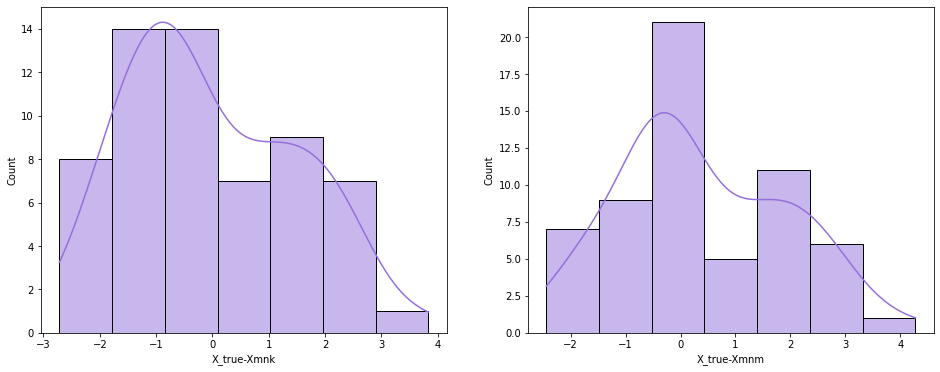

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df3['X_true-Xmnk'], kde=True, color='mediumpurple', ax=ax[0])
sns.histplot(data=df3['X_true-Xmnm'], kde=True, color='mediumpurple', ax=ax[1])

$\large Построим \; оценку \; методом\; квантильной \; регрессии \; со \;значением \; \alpha = 0.1\; и\; 0.9$ 

In [140]:
reg = QuantileRegressor(quantile=0.1, alpha=0)
reg.fit(H, df3.x)
x_mnm01 = reg.predict(H2)

In [141]:
reg = QuantileRegressor(quantile=0.9, alpha=0)
reg.fit(H, df3.x)
x_mnm09 = reg.predict(H2)

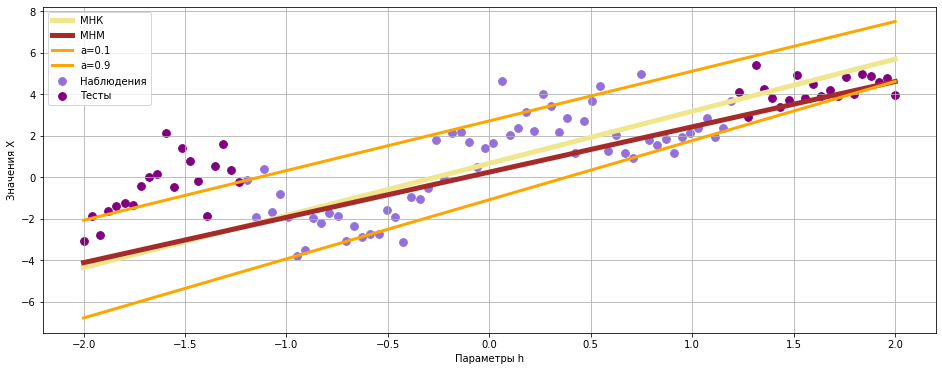

In [142]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(t, [tetha[0] + tetha[1]*i for i in t], color='khaki', linewidth = 5, label='МНК')
ax.plot(t, x_mnm2, color='brown', linewidth = 5, label='МНМ')
ax.plot(t, x_mnm01, color='orange', linewidth = 3, label='a=0.1')
ax.plot(t, x_mnm09, color='orange', linewidth = 3, label='a=0.9')
ax.scatter(df3['t'], df3['x'], color='mediumpurple', s=60, label='Наблюдения')
ax.scatter(df3_test['t'], df3_test['x'], color='purple', s=60, label='Тесты')
ax.set_xlabel('Параметры h')
ax.set_ylabel('Значения Х')
ax.grid()
ax.legend()
plt.show()